In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [66]:
aws_df = pd.read_csv('SaaS-Sales.csv')

In [67]:
aws_df['Order Date'] = pd.to_datetime(aws_df['Order Date'])

display(aws_df.info(),aws_df.describe(),aws_df.describe(exclude='number'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

None

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,NaN,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,NaN,37,2001,922,4219,2507,192,2127,5191,1842,1
mean,NaN,2022-05-01 00:07:12.259355648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2020-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2021-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-06-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2023-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2023-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
aws_df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [69]:
aws_df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [70]:
for i in aws_df:
    display(i, aws_df[i].dtype , aws_df[i].unique())

'Row ID'

dtype('int64')

array([   1,    2,    3, ..., 9992, 9993, 9994])

'Order ID'

dtype('O')

array(['EMEA-2022-152156', 'AMER-2022-138688', 'EMEA-2021-108966', ...,
       'EMEA-2020-110422', 'AMER-2023-121258', 'AMER-2023-119914'],
      dtype=object)

'Order Date'

dtype('<M8[ns]')

<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]

'Date Key'

dtype('int64')

array([20221109, 20220613, 20211011, ..., 20220604, 20210412, 20200122])

'Contact Name'

dtype('O')

array(['Nathan Bell', 'Deirdre Bailey', 'Zoe Hodges', 'Thomas Hodges',
       'Adrian Hunter', 'Adrian Abraham', 'Emily Morrison',
       'Claire Welch', 'Carol Campbell', 'Blake Hughes', 'Melanie Sharp',
       'Luke Bower', 'Jonathan Ferguson', 'Sam Parsons', 'Neil Gill',
       'Amelia Campbell', 'Chloe Short', 'Jasmine Metcalfe',
       'Karen Mathis', 'Dylan Dickens', 'Sophie Lewis', 'Gavin Mitchell',
       'Katherine Dowd', 'Harry Brown', 'Brian Dickens', 'Joseph Newman',
       'Nicola Howard', 'Stewart Wilson', 'Eric McLean', 'Leah Clarkson',
       'Alison Davidson', 'Sophie Vance', 'Anne Lee', 'Maria Dyer',
       'Julia Ellison', 'Gordon McLean', 'Jessica Buckland',
       'Bernadette Nolan', 'Sonia Ince', 'William Lewis', 'Melanie Young',
       'Edward Oliver', 'Peter Quinn', 'Max Marshall', 'Jan Watson',
       'Carol Ball', 'Gavin Walsh', 'Penelope Peake', 'Amy Scott',
       'Carl Jackson', 'Joe Wallace', 'Luke Mills', 'Alexandra Dyer',
       'Rebecca Dickens', 'Audre

'Country'

dtype('O')

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

'City'

dtype('O')

array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

'Region'

dtype('O')

array(['EMEA', 'AMER', 'APJ'], dtype=object)

'Subregion'

dtype('O')

array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

'Customer'

dtype('O')

array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

'Customer ID'

dtype('int64')

array([1017, 1056, 1031, 1065, 1062, 1066, 1074, 1087, 1047, 1099, 1048,
       1025, 1063, 1043, 1051, 1083, 1077, 1101, 1058, 1015, 1028, 1068,
       1011, 1059, 1006, 1067, 1001, 1035, 1002, 1072, 1098, 1088, 1094,
       1032, 1052, 1095, 1014, 1093, 1089, 1075, 1100, 1096, 1019, 1078,
       1004, 1027, 1036, 1045, 1026, 1041, 1082, 1022, 1007, 1055, 1033,
       1005, 1054, 1057, 1046, 1064, 1010, 1003, 1039, 1049, 1081, 1080,
       1090, 1085, 1030, 1038, 1042, 1060, 1009, 1008, 1023, 1024, 1076,
       1070, 1013, 1084, 1061, 1092, 1050, 1034, 1029, 1018, 1044, 1021,
       1073, 1040, 1012, 1097, 1053, 1086, 1071, 1016, 1020, 1091, 1079])

'Industry'

dtype('O')

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

'Segment'

dtype('O')

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

'Product'

dtype('O')

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

'License'

dtype('O')

array(['16GRM07R1K', 'QLIW57KZUV', 'JI6BVL70HQ', ..., 'I5SVMI6M88',
       'JHLW4P6LQ2', '3NTBV9B3PS'], dtype=object)

'Sales'

dtype('float64')

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

'Quantity'

dtype('int64')

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12])

'Discount'

dtype('float64')

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

'Profit'

dtype('float64')

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [71]:

q1 = aws_df['Profit'].describe()['25%']
print(f'Profit ({len(aws_df["Profit"])} rows):')
print(f'Q1 = {q1}')
q3 = aws_df['Profit'].describe()['75%']
print(f'Q3 = {q3}')
IQR = q3-q1

lowerBound = q1 - (1.5*IQR)
upperBound = q3 + (1.5*IQR)

outliersProfit = aws_df[(aws_df['Profit'] < lowerBound) | (aws_df['Profit'] > upperBound)]
print(f'Outliers ({len(outliersProfit)} rows):')

aws_df_profitClean = aws_df.drop(outliersProfit.index)
print(f'Outliers ({len(aws_df_profitClean)} rows):')
aws_df_profitClean






Profit (9994 rows):
Q1 = 1.72875
Q3 = 29.364
Outliers (1881 rows):
Outliers (8113 rows):


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694
6,7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.100,5,0.0,55.6470
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932


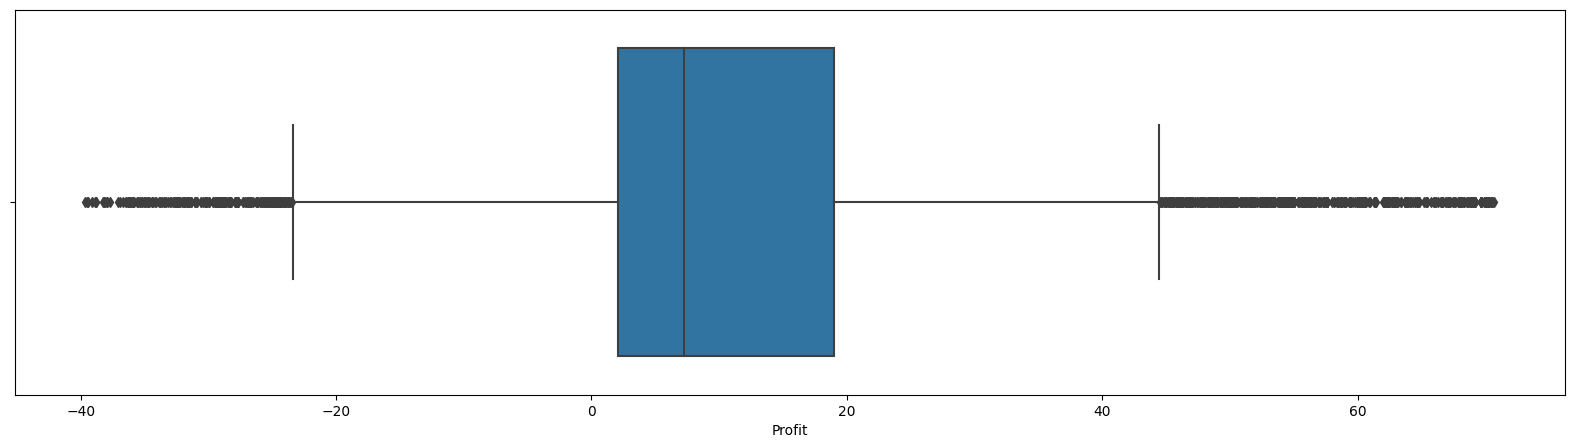

In [72]:
plt.figure(figsize=(20,5))
sns.boxplot(data = aws_df_profitClean, x='Profit')
plt.show()

#aws_df[aws_df['Profit']>6000]

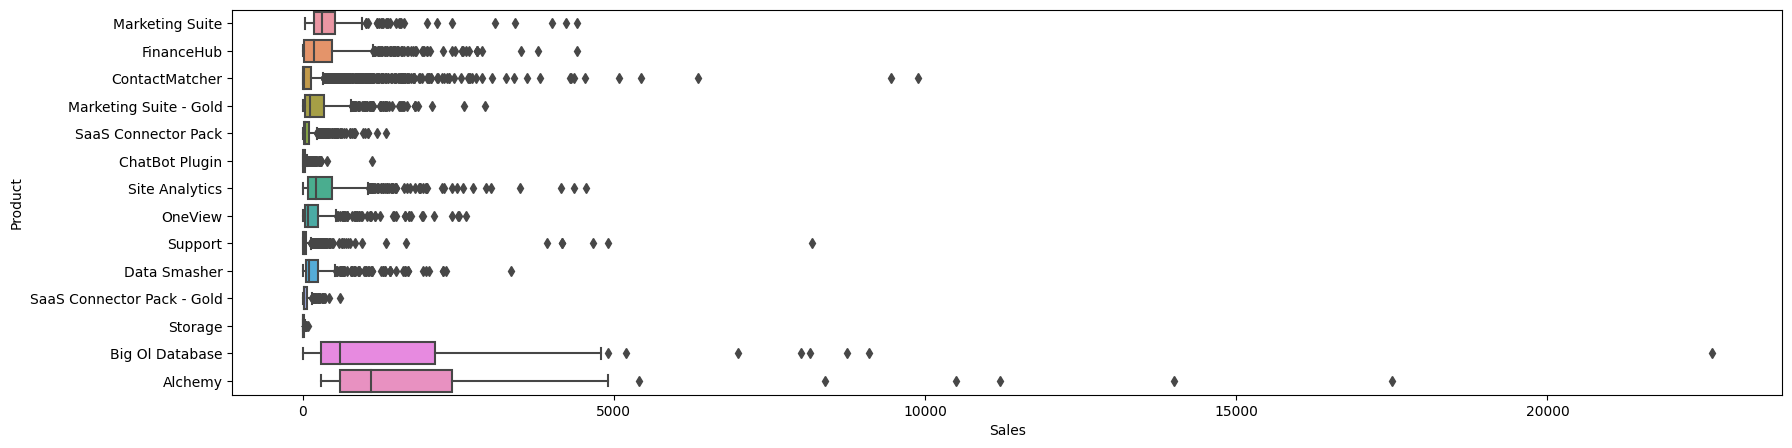

In [73]:
plt.figure(figsize=(20,5))
sns.boxplot(data = aws_df, x='Sales',y='Product')
plt.show()

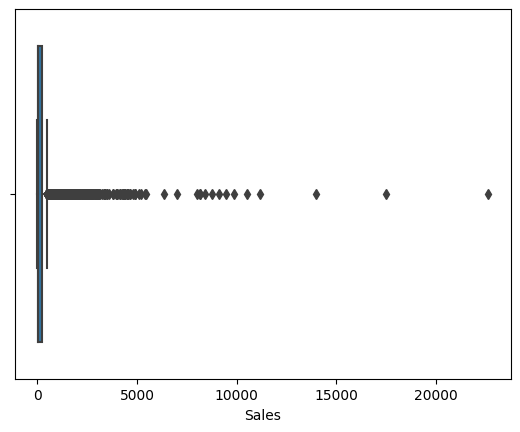

Sales (9994 rows):
Q1 = 17.28
Q3 = 209.94
Outliers (1167 rows):
Final (8827 rows):


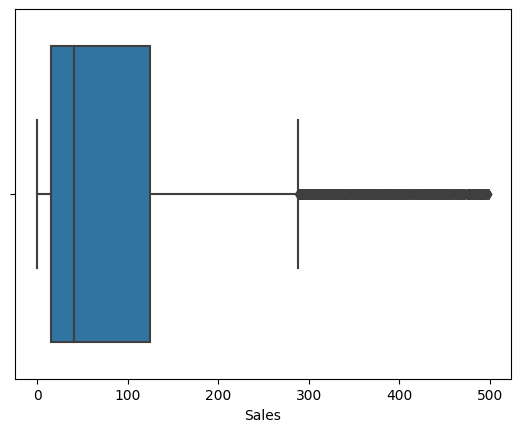

In [74]:
aws_df2 = aws_df.copy()

plt.figure()
sns.boxplot(
    data= aws_df2,
    x='Sales'
)
plt.show()

q1 = aws_df2['Sales'].describe()['25%']
print(f'Sales ({len(aws_df2["Sales"])} rows):')
print(f'Q1 = {q1}')
q3 = aws_df2['Sales'].describe()['75%']
print(f'Q3 = {q3}')
IQR = q3-q1

lowerBound = q1 - (1.5*IQR)
upperBound = q3 + (1.5*IQR)

outliersSales = aws_df2[(aws_df2['Sales'] < lowerBound) | (aws_df2['Sales'] > upperBound)]
print(f'Outliers ({len(outliersSales)} rows):')

aws_df2_sales_clean = aws_df2.drop(outliersSales.index)
print(f'Final ({len(aws_df2_sales_clean)} rows):')
aws_df2_sales_clean


plt.figure()
sns.boxplot(
    data= aws_df2_sales_clean,
    x='Sales'
)
plt.show()


In [75]:
def monthToQuartile (x):
    if x <= 3:
        return 'Q1'
    elif x <= 6:
        return 'Q2'
    elif x <= 9:
        return 'Q3'
    else:
        return 'Q4'

In [76]:
aws_df2['Order Date'] = pd.to_datetime(aws_df2['Order Date'])
aws_df2['Order YearMonth'] = aws_df2['Order Date'].apply(lambda x : str(x)[:7])
aws_df2['Order YearMonth'] = pd.to_datetime(aws_df2['Order YearMonth'])

aws_df2['Order Year'] = aws_df2['Order YearMonth'].apply(lambda x: str(x)[:4])
aws_df2['Order Month'] = aws_df2['Order YearMonth'].apply(lambda x: int(str(x)[5:7]))
aws_df2['Order Quartile'] = aws_df2['Order Month'].apply(monthToQuartile)
aws_df2['Order YearQuartile'] = aws_df2['Order Year'] + '-' + aws_df2['Order Quartile']

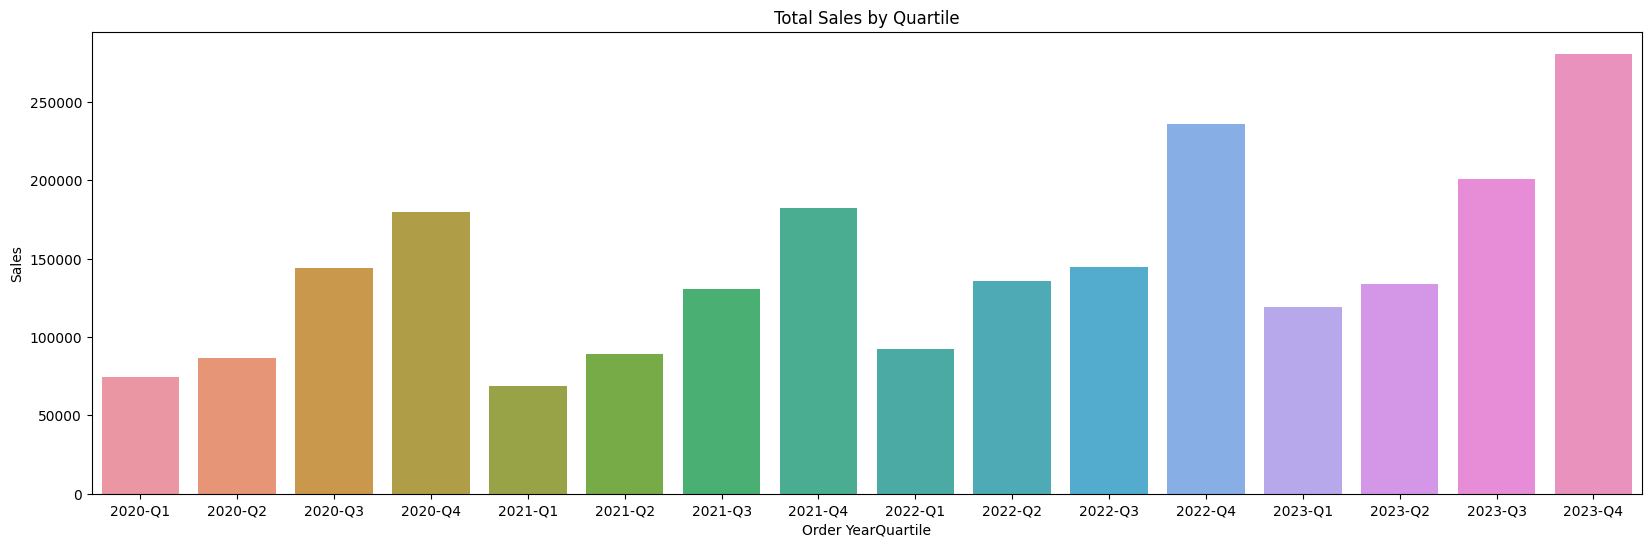

In [77]:
plt.figure(figsize=(20,6))

sns.barplot(
    data = aws_df2.sort_values('Order YearQuartile'),
    x = 'Order YearQuartile',
    y = 'Sales',
    estimator="sum",
    ci=0
)

plt.title('Total Sales by Quartile')

plt.show()


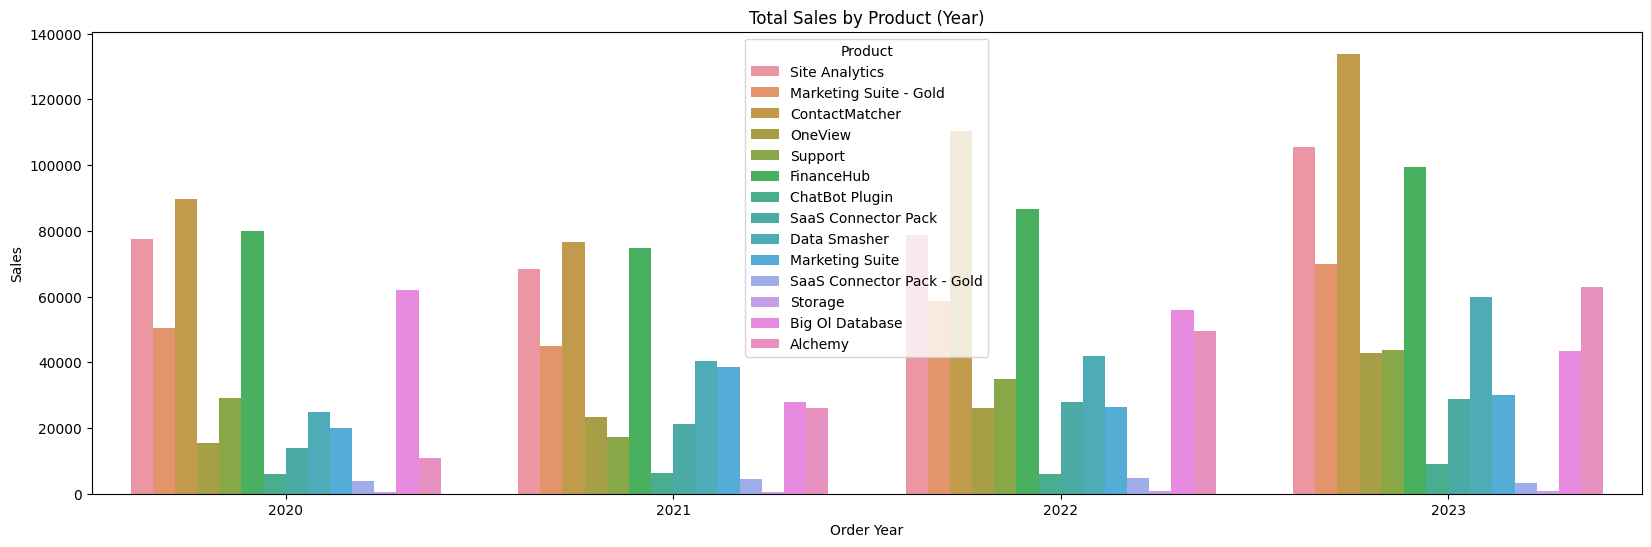

In [78]:
aws_df2_sales_product_group = aws_df2.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(20,6))

sns.barplot(
    data = aws_df2.sort_values('Order YearQuartile'),
    x = 'Order Year',
    y = 'Sales',
    hue = 'Product',
    estimator="sum",
    ci=0
)

plt.title('Total Sales by Product (Year)')

plt.show()